<a href="https://colab.research.google.com/github/ND-CSE-30151/spring-2024/blob/main/notes/21-ram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Notebook 21: RAM machines

In [1]:
#@title Setup
!pip install -qqq tock
from tock import *
!test -x /content/theory || git clone --quiet https://github.com/ND-CSE-30151/spring-2024 /content/theory
%cd -q /content/theory/notes

## RAM machines

An extension that the book does not discuss is *random-access memory*. Standard Turing machines access their memory (tape) by moving a head one location at a time. Extending them to be able to access any memory location results in a new kind of machine, the *RAM machine*, which was defined in [a paper by Cook and Reckhow in 1973](https://doi.org/10.1016/S0022-0000%2873%2980029-7).

You don't need to learn the definition of RAM machine, nor will we ask you to write one. But you should be familiar with the basic concept. The reason RAM machines are of interest is because RAM machines (not Turing machines) are the theoretical "hardware" that you will use to analyze algorithms in Algorithms class. (But are real computers really more like RAM machines than Turing machines? We'll take this question up again later in Unit IV.)

A RAM machine's memory consists of a tape extending infinitely to the right. The cells are named $X[0], X[1], X[2], \ldots$. But instead of each cell containing a symbol drawn from a finite alphabet, each cell contains an integer (without any upper or lower bound).

The states are numbered consecutively from the initial state $0$. Unless otherwise specified, after each operation, the machine goes to the next-numbered state. (Just like assembly language.)

Whereas a Turing machine's operations each consisted of a read, a write, and a move, a RAM machine instruction is one of the following:

- $X[i] \leftarrow C$ where $C$ is an integer: write $C$ to memory location $X[i]$.
- $X[i] \leftarrow X[j] + X[k]$: read $X[j]$ and $X[k]$, add them, and write the result in $X[i]$.
- $X[i] \leftarrow X[j] - X[k]$: read $X[j]$ and $X[i]$, subtract them, and write the result in $X[i]$.
- $X[i] \leftarrow X[X[j]]$: read address from $X[j]$, read the contents of that address, and write to $X[i]$.
- $X[X[i]] \leftarrow X[j]$: read $X[j]$, read address from $X[i]$, write $X[i]$ to the contents of that address.
- $\texttt{TRA}~m~\text{if $X[j] > 0$}$: read $X[j]$ and if it's positive, go to state $m$.

A RAM machine can be simulated on a Turing machine. We don't give a full proof here. In Cook and Reckhow's construction, the memory is represented as the tape

$$\$\mathord*a_1\#c_1\mathord*a_2\#c_2\cdots\mathord*a_n\#c_n¢$$

where each $c_i$ is the contents of memory address $a_i$. Additional tapes are used for an address register, a value register, and scratch space. The implementation-level description of a load operation would be:

1. Assume that the address tape contains an address $i$.
2. Scan the memory tape looking for the string $\mathord* i \#$.
3. If found, copy the immediately following value to the value tape.
4. Otherwise, write a $0$ to the value tape.

And a store operation would be:

1. Assume that the address tape contains an address $i$ and the value tape contains a value $x$.
2. Scan the memory tape looking for the string $\mathord* i \#$.
3. If found,
    1. Erase the immediately following value.
    2. Copy the rest of the memory tape to the scratch tape.
    3. Append the value tape to the memory tape.
    4. Append the scratch tape to the memory tape.
4. Otherwise,
    1. Scan right until $¢$ is reached; erase it.
    2. Append $\mathord* i \text{\#}$ to the memory tape.
    3. Append the value tape to the memory tape.
    4. Append $¢$ to the memory tape.

It's not hard to figure out how to implement all of the RAM machine's operations in terms of the above load/store operations.

### Beyond

A RAM machine program looks very much like an assembly language program; could we go further and compile real assembly language, or even a high-level programming language, into Turing machines?

Indeed we can -- the [ELVM project](https://github.com/shinh/elvm) defines a simple virtual machine with a simple assembly language, EIR, and provides a compiler from (a slightly restricted) C to EIR, as well as backends that translate EIR to various "esoteric languages." We've contributed a Turing machine backend, so it can *compile a C program into a Turing machine.*

In [2]:
!cat hello.c

int putchar(int);

int main() {
  const char* p = "Hello, world.\n";
  for (; *p; p++)
    putchar(*p);
  return 0;
}


Compile this into a TM:
```
$ 8cc -S -o hello.eir hello.c
$ elc -tm hello.eir > hello.tm
```

In [3]:
!wc -l hello.tm

62673 hello.tm


In [4]:
!head -100 hello.tm

// trie for jmp reg
9 _ 10 _ R
11 _ 12 _ R
13 _ 14 _ R
15 _ 16 _ R
17 _ 18 _ R
19 _ 20 _ R
21 _ 22 _ R
23 _ 24 _ R
25 _ 26 _ R
27 _ 28 _ R
29 _ 30 _ R
31 _ 32 _ R
33 _ 34 _ R
35 _ 36 _ R
37 _ 38 _ R
39 _ 40 _ R
41 _ 42 _ R
43 _ 44 _ R
45 _ 46 _ R
47 _ 48 _ R
49 _ 50 _ R
51 _ 52 _ R
53 _ 54 _ R
55 _ 56 _ R
56 0 0 0 R
56 1 1 1 R
54 0 55 0 R
57 _ 58 _ R
58 0 2 0 R
58 1 3 1 R
54 1 57 1 R
52 0 53 0 R
59 _ 60 _ R
61 _ 62 _ R
62 0 4 0 R
62 1 5 1 R
60 0 61 0 R
63 _ 64 _ R
64 0 6 0 R
64 1 7 1 R
60 1 63 1 R
52 1 59 1 R
50 0 51 0 R
48 0 49 0 R
46 0 47 0 R
44 0 45 0 R
42 0 43 0 R
40 0 41 0 R
38 0 39 0 R
36 0 37 0 R
34 0 35 0 R
32 0 33 0 R
30 0 31 0 R
28 0 29 0 R
26 0 27 0 R
24 0 25 0 R
22 0 23 0 R
20 0 21 0 R
18 0 19 0 R
16 0 17 0 R
14 0 15 0 R
12 0 13 0 R
10 0 11 0 R
// beginning-of-tape and input string
0 _ 65 ^ R
0 ^ 65 ^ R
0 $ 65 ^ R
0 0 66 ^ R
0 1 67 ^ R
0 r 65 ^ R
0 a 65 ^ R
0 v 65 ^ R
0 o 65 ^ R
0 s 65 ^ R
0 d 65 ^ R
66 _ 65 0 R
66 ^ 65 0 R
66 $ 65 0 R
66 0 66 0 R
66 1 67 0 R
66 r 65 0 R
66

Simplified state diagram (no transition labels):

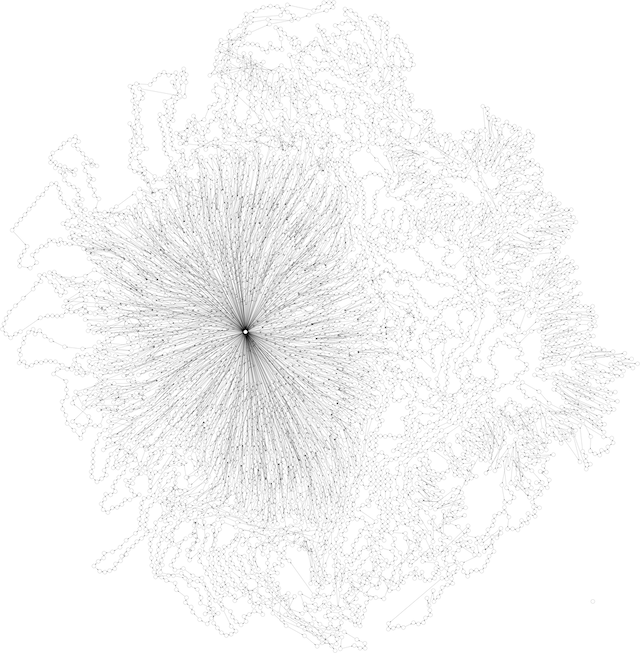

We've also contributed a Turing machine simulator, written in C; specifically, the subset of C supported by 8cc.

In [5]:
!wc -l tm.c

369 tm.c


In [6]:
%cat tm.c

/* Simulator for deterministic Turing machines.

   Usage: tm [-b] [-n] [-v|-vv] <tm-file> 

   where <tm-file> contains a description of a Turing machine. Each
   line in the machine description specifies a transition:

   q a r b d

   where 
   - q is the current state
   - a is the symbol read from the tape
   - r is the new state
   - b is the symbol written to the tape
   - d is a direction: L (left), N (no move), or R (right)

   A state can be any integer. The start state is 0. The accept state
   is -1.

   A symbol can be any non-whitespace character. The blank symbol is
   _.

   The input string is read from stdin:

   - If the -b switch is given, the input bytes are encoded on the
     tape in binary, most significant bit first. For example, "ABC"
     would be encoded as 010000010100001001000011___.... Machines
     compiled from EIR should be run with this switch.

   - If the -n switch is given, nothing is read from stdin, and the
     input string is empty.

   The tap

So...what happens if we run the C-to-TM compiler on the TM simulator?

```
$ 8cc -S -o tm.eir tm.c
$ elc -tm tm.eir > tm.tm
$ cut -d' ' -f1 tm.tm | sort -n | uniq | wc -l # count states
 1201036
$ wc -l tm.tm # count transitions
 13052703 tm.tm
```

(Just `#include <stdio.h>` generates almost 9 million transitions, so there are probably a lot of unused transitions in there!)